In [1]:
import numpy as np
from mikefm_skill.model import ModelResult
from mikefm_skill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn, name='HKZN_local')
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Number of items: 15
Time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [4]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

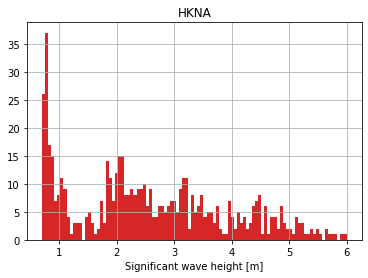

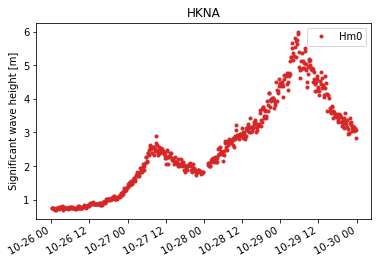

In [5]:
o1.hist(), o1.plot(); 

In [6]:
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")
o3.df.head()

,Longitude,Latitude,swh
2017-10-27 12:52:52.337098,2.422854,51.253353,1.638
2017-10-27 12:52:53.280494,2.413789,51.310268,1.383
2017-10-27 12:52:54.224001,2.404711,51.367184,1.791
2017-10-27 12:52:55.167398,2.395619,51.424099,1.700
2017-10-27 12:52:56.110895,2.386516,51.481014,1.800


In [7]:
mr.add_observation(o1, item=0)
mr.add_observation(o2, item=0)
mr.add_observation(o3, item=0)
mr.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

<AxesSubplot:>

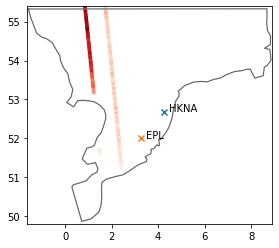

In [8]:
mr.plot_observation_positions()

In [9]:
cc = mr.extract()

In [10]:
cc.skill_report()

,bias,rmse,corr_coef,scatter_index
HKNA,-0.195266,0.352283,0.971082,0.088488
EPL,-0.075335,0.216357,0.972467,0.073902
c2,-0.001210,0.351796,0.974335,0.118511


In [11]:
o3.geometry.bounds

(-0.041284799575805664,
 51.253353118896484,
 9.36086654663086,
 59.998504638671875)

In [12]:
from mikefm_skill.metrics import mean_absolute_error
cc["c2"].skill(metric=mean_absolute_error)

0.2945848803588891

In [13]:
cc.skill_report()

,bias,rmse,corr_coef,scatter_index
HKNA,-0.195266,0.352283,0.971082,0.088488
EPL,-0.075335,0.216357,0.972467,0.073902
c2,-0.001210,0.351796,0.974335,0.118511


<AxesSubplot:title={'center':'HKNA'}, ylabel='Significant wave height [m]'>

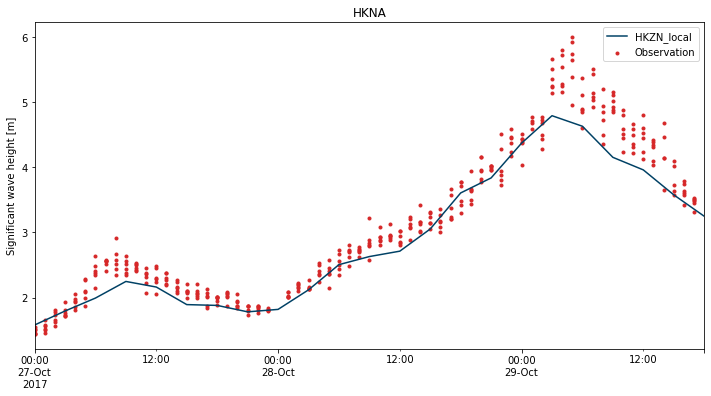

In [14]:
cc["HKNA"].plot_timeseries(figsize=(12,6))

In [15]:
cc["HKNA"].plot_timeseries(width=1000,backend="plotly")

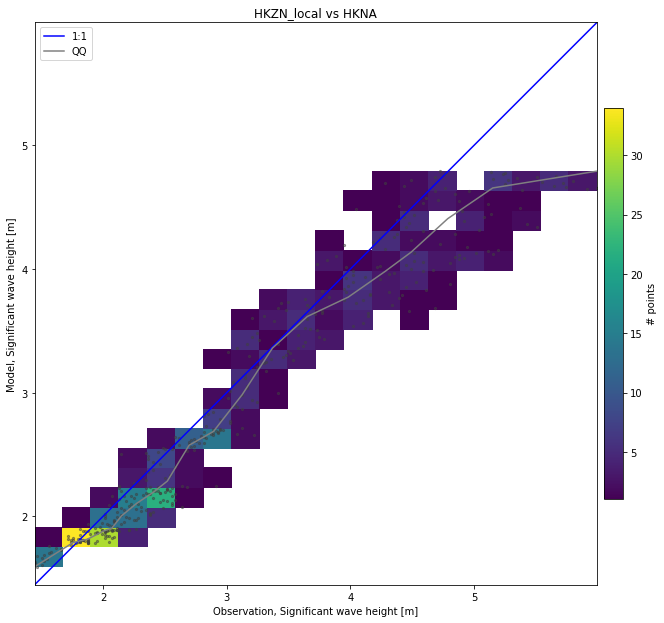

In [16]:
cc["HKNA"].scatter(figsize=(12,12))

In [17]:
cc["HKNA"].scatter(backend='plotly', width=700, height=700)

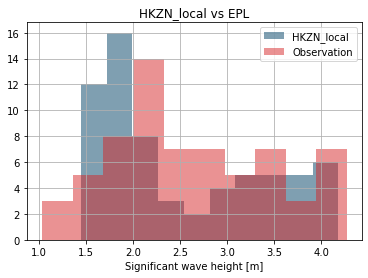

In [18]:
cc["EPL"].hist(bins=10)

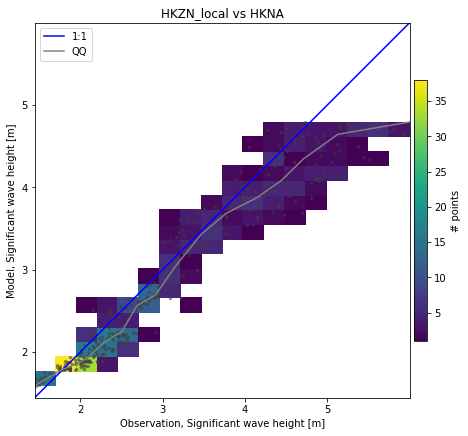

In [19]:
cc["HKNA"].scatter(binsize=0.25, cmap="viridis")

## Automatic reporting

In [45]:
from mikefm_skill.report import Reporter
rep = Reporter(mr)

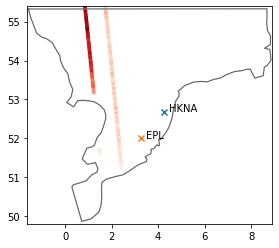

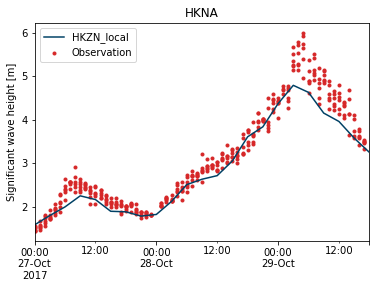

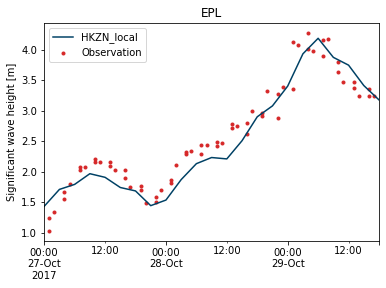

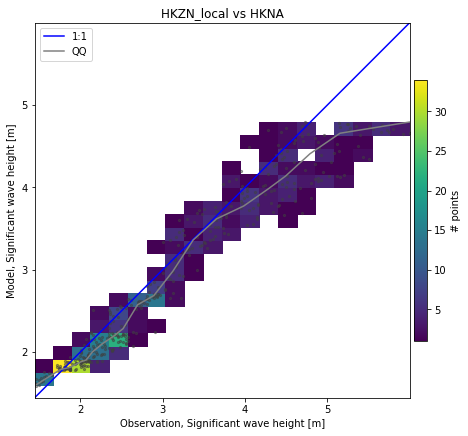

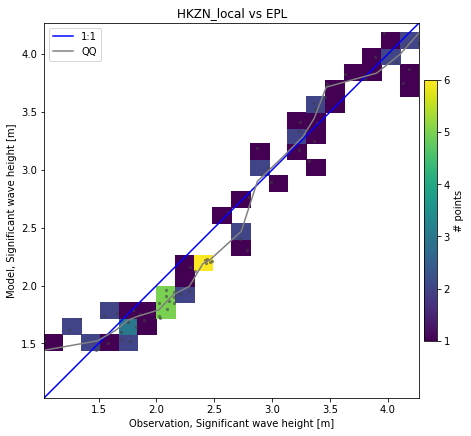

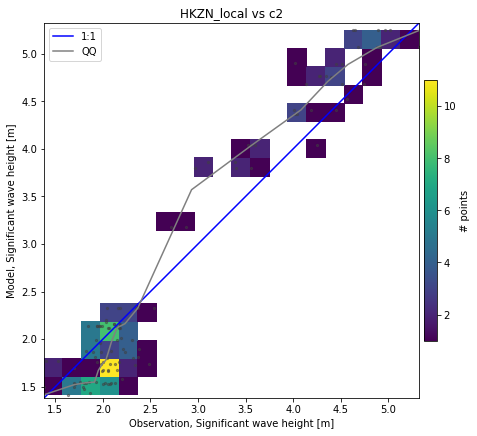

In [47]:
mdfilename = rep.markdown() # TODO plots should not appear in the output cell